# Week 2 Assignment
I'll be using data from the state on medication assisted treatment for medi-cal patient for opioid use disorder quarterly by county

In [2]:
# import required packages
import pandas as pd
import geopandas as gpd
import numpy as np
import folium as fm
import statistics

In [3]:
# import data with pandas
df = pd.read_csv('data/cookcounty_overdose.csv')

# Convert to geopandas dataframe
od_cook = gpd.GeoDataFrame(df, 
    geometry = gpd.points_from_xy(df['longitude'], df['latitude']), 
    crs = 'EPSG:4326')
od_cook.dtypes


/tmp/ipykernel_119/4239539136.py:2: DtypeWarning: Columns (15,16,20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/cookcounty_overdose.csv')


Case Number                 object
Date of Incident            object
Date of Death               object
Age                        float64
Gender                      object
Race                        object
Latino                        bool
Manner of Death             object
Primary Cause               object
Primary Cause Line A        object
Primary Cause Line B        object
Primary Cause Line C        object
Secondary Cause             object
Gun Related                 object
Opioid Related              object
Cold Related                object
Heat Related                object
Commissioner District      float64
Incident Address            object
Incident City               object
Incident Zip Code           object
longitude                  float64
latitude                   float64
location                    object
Residence City              object
Residence Zip               object
OBJECTID                   float64
Chicago Ward               float64
Chicago Community Ar

In [4]:
# Preview sample of data
od_cook.head()

Case Number        Date of Incident           Date of Death   Age  Gender  \
0  ME2020-05711  05/15/2020 06:00:00 PM  05/15/2020 10:52:00 PM  67.0  Female   
1  ME2014-00627  09/21/2014 10:00:00 AM  09/21/2014 01:50:00 PM  25.0    Male   
2  ME2014-00649  09/22/2014 04:40:00 PM  09/22/2014 04:55:00 PM  61.0    Male   
3  ME2014-00712  09/27/2014 04:58:00 PM  09/27/2014 05:10:00 PM  51.0    Male   
4  ME2014-00792  10/02/2014 12:00:00 AM  10/02/2014 02:15:00 PM  55.0    Male   

    Race  Latino Manner of Death  \
0  White   False         PENDING   
1  Black   False    UNDETERMINED   
2  Black   False         NATURAL   
3  White   False         NATURAL   
4  Black   False         NATURAL   

                                       Primary Cause  \
0                                                NaN   
1                                           DROWNING   
2  HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR D...   
3                              DIABETIC KETOACIDOSIS   
4  HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCUL...   

                                Primary Cause Line A  ...  longitude  \
0                                                NaN  ...        NaN   
1                                           DROWNING  ... -87.615461   
2  HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR D...  ... -87.623221   
3                              DIABETIC KETOACIDOSIS  ...        NaN   
4  HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCUL...  ...        NaN   

    latitude                     location Residence City Residence Zip  \
0        NaN                          NaN            NaN           NaN   
1  41.889480  (41.88948019, -87.61546076)            NaN         60608   
2  41.507334     (41.507334, -87.6232215)            NaN         60411   
3        NaN                          NaN            NaN         60525   
4        NaN                          NaN            NaN           NaN   

  OBJECTID Chicago Ward  Chicago Community Area COVID Related  \
0  38479.0          NaN                     NaN           NaN   
1      1.0         42.0         NEAR NORTH SIDE         False   
2      2.0          NaN                     NaN         False   
3      3.0          NaN                     NaN         False   
4      4.0          NaN                     NaN         False   

                     geometry  
0                 POINT EMPTY  
1  POINT (-87.61546 41.88948)  
2  POINT (-87.62322 41.50733)  
3                 POINT EMPTY  
4                 POINT EMPTY  

[5 rows x 31 columns]

In [5]:
# Remove null values
od_cook.dropna(subset=['Opioid Related', 'latitude','longitude'], inplace=True)

In [6]:
# Trim data
desired_columns = ['Date of Incident', 'Date of Death', 'Age', 'Gender', 'Race', 'Primary Cause', 'Opioid Related', 'latitude', 'longitude', 'location', 'geometry']

# Save data in new df
od_cook_trimmed = od_cook[desired_columns].copy()
od_cook_trimmed.head()

Date of Incident           Date of Death   Age  Gender   Race  \
1   09/21/2014 10:00:00 AM  09/21/2014 01:50:00 PM  25.0    Male  Black   
2   09/22/2014 04:40:00 PM  09/22/2014 04:55:00 PM  61.0    Male  Black   
5   10/08/2014 10:30:00 AM  10/08/2014 10:35:00 AM  67.0    Male  Black   
27  01/12/2015 09:00:00 PM  01/13/2015 11:30:00 AM  49.0    Male  Black   
34  02/06/2015 07:00:00 PM  02/06/2015 07:43:00 PM  70.0  Female  Black   

                                        Primary Cause Opioid Related  \
1                                            DROWNING          False   
2   HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR D...          False   
5   HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCUL...          False   
27                             ACUTE BRONCHIAL ASTHMA           True   
34            ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE          False   

     latitude  longitude                     location  \
1   41.889480 -87.615461  (41.88948019, -87.61546076)   
2   41.507334 -87.623221     (41.507334, -87.6232215)   
5   41.684706 -87.631515      (41.684706, -87.631515)   
27  41.894613 -87.717236     (41.894613, -87.7172355)   
34  41.771349 -87.575558     (41.771349, -87.5755575)   

                      geometry  
1   POINT (-87.61546 41.88948)  
2   POINT (-87.62322 41.50733)  
5   POINT (-87.63151 41.68471)  
27  POINT (-87.71724 41.89461)  
34  POINT (-87.57556 41.77135)

In [7]:
# Check our work for reducing columns
od_cook_trimmed.columns.to_list()

['Date of Incident',
 'Date of Death',
 'Age',
 'Gender',
 'Race',
 'Primary Cause',
 'Opioid Related',
 'latitude',
 'longitude',
 'location',
 'geometry']

In [8]:
# Create new dataframe with only deaths involving opiates
opioid_true = od_cook_trimmed[od_cook_trimmed['Opioid Related'] > 0]
opioid_true.info

<bound method DataFrame.info of              Date of Incident           Date of Death   Age  Gender   Race  \
27     01/12/2015 09:00:00 PM  01/13/2015 11:30:00 AM  49.0    Male  Black   
162    03/21/2019 11:15:00 PM  03/22/2019 12:20:00 AM  43.0    Male  White   
203    09/19/2014 02:22:00 PM  09/19/2014 03:31:00 PM  21.0  Female  White   
209    02/07/2015 10:30:00 PM  02/07/2015 11:06:00 PM  20.0    Male  White   
215    08/11/2017 04:01:00 PM  08/11/2017 04:21:00 PM  43.0  Female  White   
...                       ...                     ...   ...     ...    ...   
67397  06/12/2022 09:40:00 PM  06/14/2022 08:24:00 PM  84.0  Female  White   
67403  06/15/2022 01:15:00 AM  06/15/2022 01:55:00 AM  42.0    Male  White   
67411  06/15/2022 11:59:00 AM  06/15/2022 12:01:00 PM  23.0    Male  Black   
67412  06/10/2022 11:37:00 PM  06/15/2022 08:30:00 AM  25.0    Male  White   
67413  06/15/2022 09:34:00 AM  06/15/2022 09:46:00 AM  50.0    Male  White   

                               

In [9]:
opioid_true.geometry

27       POINT (-87.71724 41.89461)
162      POINT (-87.70847 41.93169)
203      POINT (-87.83893 41.87887)
209      POINT (-87.73209 42.02927)
215      POINT (-87.74462 41.64959)
                    ...            
67397    POINT (-87.73757 41.98695)
67403    POINT (-87.73574 41.79404)
67411    POINT (-87.62924 41.64059)
67412    POINT (-87.82124 41.71874)
67413    POINT (-87.64853 41.95405)
Name: geometry, Length: 9683, dtype: geometry

<Axes: >

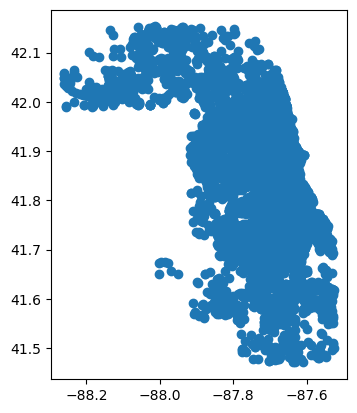

In [10]:
opioid_true.plot()

In [16]:
# Calculate mean values for longitude and latitude to center map
long_mean = opioid_true.longitude.mean()
lat_mean = opioid_true.latitude.mean()
print(lat_mean)
print(long_mean)

41.84304382573376
-87.7206060531075


In [18]:
m = fm.Map(location=[-87.7206060531075,41.84304382573376], zoom_start=10)

# for index, row in opioid_true.iterrows():
  #  fm.Marker(location=[row.longitude, row.latitude]).add_to(m)
m